In [1]:
import pandas

data = pandas.read_csv('data/world-happiness-report-2017.csv')

input_data = data[['Economy..GDP.per.Capita.', 'Freedom']]
input_data_array = input_data.values
output_data = data['Happiness.Score']

array([[<Axes: title={'center': 'Economy..GDP.per.Capita.'}>,
        <Axes: title={'center': 'Freedom'}>]], dtype=object)

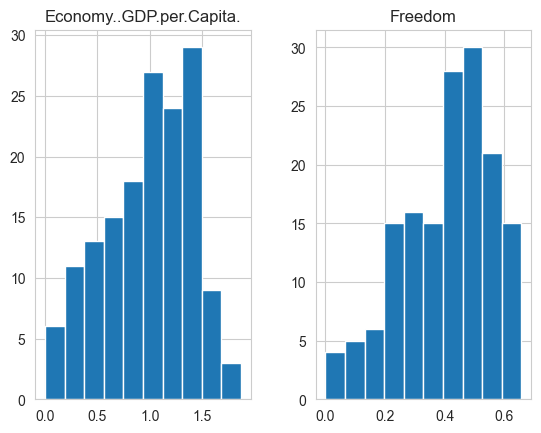

In [2]:
input_data.hist()

<Axes: >

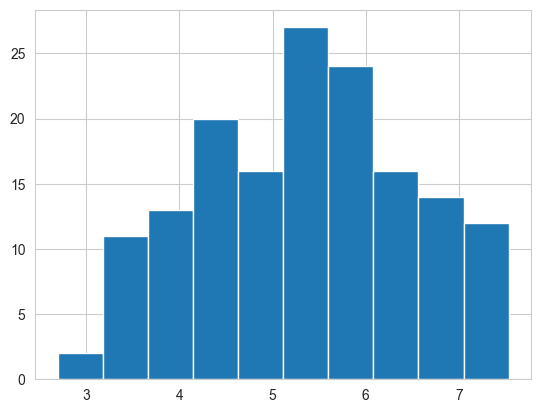

In [3]:
output_data.hist()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

input_data = scaler.fit_transform(input_data_array)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

batch_size = 32

model = SGDRegressor()

input_train, input_test, output_train, output_test = train_test_split(input_data.reshape(-1, 2), output_data,
                                                                      test_size=0.2, random_state=42)
for i in range(0, len(input_train), batch_size):
    model.partial_fit(input_train[i:i + batch_size], output_train[i:i + batch_size])

predicted = model.predict(input_test)

In [6]:
import numpy

no_of_points = 50
x_ref_1 = []
val = min([x[0] for x in input_data])
step_1 = (max([x[0] for x in input_data]) - min([x[0] for x in input_data])) / no_of_points
for _ in range(1, no_of_points):
    for _ in range(1, no_of_points):
        x_ref_1.append(val)
    val += step_1

x_ref_2 = []
val = min([x[1] for x in input_data])
step_2 = (max([x[1] for x in input_data]) - min([x[1] for x in input_data])) / no_of_points
for _ in range(1, no_of_points):
    aux = val
    for _ in range(1, no_of_points):
        x_ref_2.append(aux)
        aux += step_2
y_ref = [model.predict(scaler.transform(numpy.array([el1, el2]).reshape(1, -1))) for el1, el2 in zip(x_ref_1, x_ref_2)]

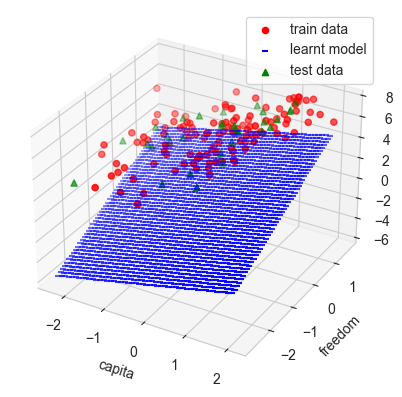

In [7]:
from matplotlib import pyplot as plt


def plot_3d_data(x1_train, x2_train, y_train, x1_model = None, x2_model = None, y_model = None, x1_test = None, x2_test = None, y_test = None, title = None):
    ax = plt.axes(projection = '3d')
    if x1_train:
        ax.scatter(x1_train, x2_train, y_train, c ='r', marker ='o', label ='train data') 
    if x1_model:
        ax.scatter(x1_model, x2_model, y_model, c ='b', marker ='_', label ='learnt model') 
    if x1_test:
        ax.scatter(x1_test, x2_test, y_test, c ='g', marker ='^', label ='test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()
    
plot_3d_data([x[0] for x in input_train], [x[1] for x in input_train], output_train, x_ref_1, x_ref_2, y_ref, [x[0] for x in input_test], [x[1] for x in input_test], output_test)

In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(output_test, predicted)

print("Mean Squared Error:", mse)

Mean Squared Error: 11.416988387592843
